In [1]:
import tensorflow as tf
from tensorflow import keras
tf.keras.__version__

'3.5.0'

In [2]:
import os, shutil
import random
import numpy as np

In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = r"D:\Test\Deep_Learning\Assignment_2\dogs-vs-cats\train"

# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small1'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
train_num = 1000
validation_num = 500
test_num = 500

all_images = os.listdir(original_dataset_dir)


cat_fnames = [f for f in all_images if f.startswith('cat.') and f.endswith('.jpg')]
dog_fnames = [f for f in all_images if f.startswith('dog.') and f.endswith('.jpg')]


train_cats = random.sample(cat_fnames,train_num)
validation_cats = random.sample(list(set(cat_fnames) - set(train_cats)),validation_num)
test_cats = random.sample(list(set(cat_fnames) - set(train_cats) - set(validation_cats)),test_num)

train_dogs = random.sample(dog_fnames,train_num)
validation_dogs = random.sample(list(set(dog_fnames) - set(train_dogs)),validation_num)
test_dogs = random.sample(list(set(dog_fnames) - set(train_dogs) - set(validation_dogs)),test_num)

def copy_images(fnames,src_dir,dst_dir):
    os.makedirs(dst_dir,exist_ok=True)
    for fname in fnames:
        src = os.path.join(src_dir,fname)
        dst = os.path.join(dst_dir,fname)
        shutil.copyfile(src,dst)


copy_images(train_cats,original_dataset_dir,train_cats_dir)
copy_images(validation_cats,original_dataset_dir,validation_cats_dir)
copy_images(test_cats,original_dataset_dir,test_cats_dir)


copy_images(train_dogs,original_dataset_dir,train_dogs_dir)
copy_images(validation_dogs,original_dataset_dir,validation_dogs_dir)
copy_images(test_dogs,original_dataset_dir,test_dogs_dir)

In [31]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [32]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [33]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [34]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [35]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [36]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Initialize the model
model = Sequential()

# Add convolutional layers with max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output before the dense layers
model.add(layers.Flatten())

# Add dense layers for classification
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(learning_rate=1e-4),
#               metrics=['accuracy'])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [45]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy',save_best_only=True)

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,callbacks=[early_stopping,model_checkpoint])

Epoch 1/30


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step - accuracy: 0.5023 - loss: 0.7535 - val_accuracy: 0.5160 - val_loss: 0.6837
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30


C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\1041238\Anaconda3\envs\deeplearn\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - accuracy: 0.5846 - loss: 0.6729 - val_accuracy: 0.5220 - val_loss: 0.6927
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.5669 - loss: 0.6823 - val_accuracy: 0.5940 - val_loss: 0.6738
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 317ms/step - accuracy: 0.6171 - loss: 0.6558 - val_accuracy: 0.6590 - val_loss: 0.6231
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 309ms/step - accuracy: 0.6867 - loss: 0.5743 - val_accuracy: 0.6640 - val_loss: 0.6107
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - accuracy: 0.7640 - loss: 0.4934 - val_accura

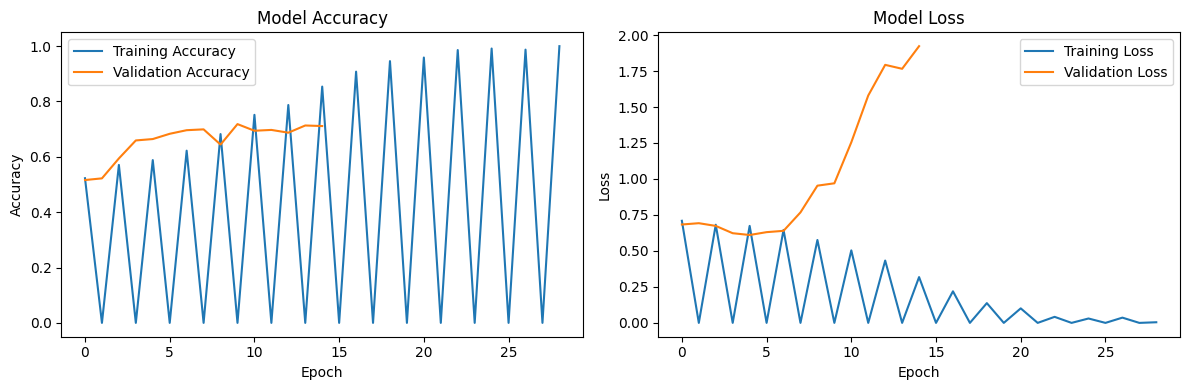

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = load_model(r'D:\Test\Deep_Learning\Assignment_2\notebooks related to HW 5__\cats_and_dogs_small_1.h5')

In [4]:
img_path = 'lion_head.jpeg'
img =cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(150,150))
img_array = np.expand_dims(img,axis=0)/255.0

In [5]:
prediction = model.predict(img_array)
print(f"Prob of being a cat: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Prob of being a cat: 0.9552


In [6]:
def display_activation_maps(activations,layer_name):
    fig,exes = plt.subplot(4,8,figsize=(20,10))
    fig.suptitle(f"Activation Map for {layer_name}")
    for i, ax in enumerate(axes.flat):
        if i < activations.shape[-1]:
            ax.imshow(activations[0,:,:,i],cmap='viridis')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
def get_conv_layers(model):
    return [layer for layer in model.layers if isinstance(layer,tf.keras.layers.Conv2D)]

conv_layers = get_conv_layers(model)

In [8]:
if len(conv_layers) < 3:
    print(f"The model has {len(conv_layers)} conv layers")

In [ ]:
layer_outputs = [layer.output for layer in conv_layers[:3]]
intermediate_model = tf.keras.Model(inputs=model.input,outputs=layer_outputs)

In [ ]:
intermediate_activations = intermediate_model.predict(img_array)

for i, activations in enumerate(intermediate_activations):
    display_activation_maps(activations,f"Conv Layer {i+1}")

In [ ]:
if len(intermediate_activations) > 0:
    first_layer_act = intermediate_activations[0]
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    ax1.imshow(first_layer_act[0,:,:,min(2,first_layer_act.shape[-1]-1)],cmap='viridis')
    ax1.set_title('Channel 2 (or last if < 3 channels)')
    ax1.axis('off')
    ax1.imshow(first_layer_act[0,:,:,min(28,first_layer_act.shape[-1]-1)],cmap='viridis')
    ax1.set_title('Channel 28 (or last if < 29 channels)')
    ax1.axis('off')
    plt.show()
else:
    print('No Conv layers found in the model')
    

In [ ]:
# layer_names = ['conv2d','conv2d_1','conv2d_2']
# intermediate_model = tf.keras.Model(inputs=model.input,outputs=[model.get_layer(name).output for name in layer_names])
# intermediate_activations = intermediate_model.predict(img_array)


# for i, activations in enumerate(intermediate_activations):
#     display_activation_maps(activations,layer_names[i])


# first_layer_act = intermediate_activations[0]
# fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
# ax1.imshow(first_layer_act[0,:,:,2],cmap='viridis')
# ax1.set_title('Channel 2')
# ax1.axis('off')
# ax1.imshow(first_layer_act[0,:,:,28],cmap='viridis')
# ax1.set_title('Channel 28')
# ax1.axis('off')
# plt.show()